# AstronomyCalc tutorial
This is a tutorial to show an usage of the [AstronomyCalc](https://github.com/sambit-giri/AstronomyCalc) package.

# Model universes
Here simulation of a few model universes are shown.

### Setting the general code parameters

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
try:
  import AstronomyCalc
except:
  !pip install git+https://github.com/sambit-giri/AstronomyCalc.git
  import AstronomyCalc

code_param_dict = {'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}

### Einsten-de Sitter universe

In this model, the universe is assumed to be dominated by matter.

In [3]:
cosmo_dict = {'Om': 1.0, 'Or': 0, 'Ok': 0, 'Ode': 0, 'h': 0.67}
param_EdS = AstronomyCalc.param(cosmo=cosmo_dict, code=code_param_dict)

print('Cosmological parameters')
print(param_EdS.cosmo.__dict__)
print('Code parameters')
print(param_EdS.code.__dict__)

Cosmological parameters
{'Om': 1.0, 'Or': 0, 'Ok': 0, 'Ode': 0, 'h': 0.67, 'Tcmb': 2.725}
Code parameters
{'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}


In [4]:
D_EdS = AstronomyCalc.CosmoDistances(param_EdS)

### de Sitter universe

In this model, the universe is assumed to be dominated by dark energy.

In [5]:
cosmo_dict = {'Om': 0.0, 'Or': 0, 'Ok': 0, 'Ode': 1.0, 'h': 0.67}
param_dS = AstronomyCalc.param(cosmo=cosmo_dict, code=code_param_dict)

print('Cosmological parameters')
print(param_dS.cosmo.__dict__)
print('Code parameters')
print(param_dS.code.__dict__)

Cosmological parameters
{'Om': 0.0, 'Or': 0, 'Ok': 0, 'Ode': 1.0, 'h': 0.67, 'Tcmb': 2.725}
Code parameters
{'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}


In [6]:
D_dS = AstronomyCalc.CosmoDistances(param_dS)

### Benchmark model or flat $\Lambda$-cold dark matter ($\Lambda$CDM) universe

In this model, the universe is flat ($\Omega_m+\Omega_r+\Omega_{DE}=1$ or $\Omega_\kappa=0$) universe containing cold dark matter and constant dark energy. This model best explains the Cosmic Microwave Background (CMB) observations from WMAP and Planck. 

In [7]:
cosmo_dict = {'Om': 0.31, 'Or': 0.0, 'Ok': 0.0, 'Ode': 0.69, 'h': 0.67}
param = AstronomyCalc.param(cosmo=cosmo_dict, code=code_param_dict)

print('Cosmological parameters')
print(param.cosmo.__dict__)
print('Code parameters')
print(param.code.__dict__)

Cosmological parameters
{'Om': 0.31, 'Or': 0.0, 'Ok': 0.0, 'Ode': 0.69, 'h': 0.67, 'Tcmb': 2.725}
Code parameters
{'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}


In [8]:
D = AstronomyCalc.CosmoDistances(param)

## Plot distances in model universes

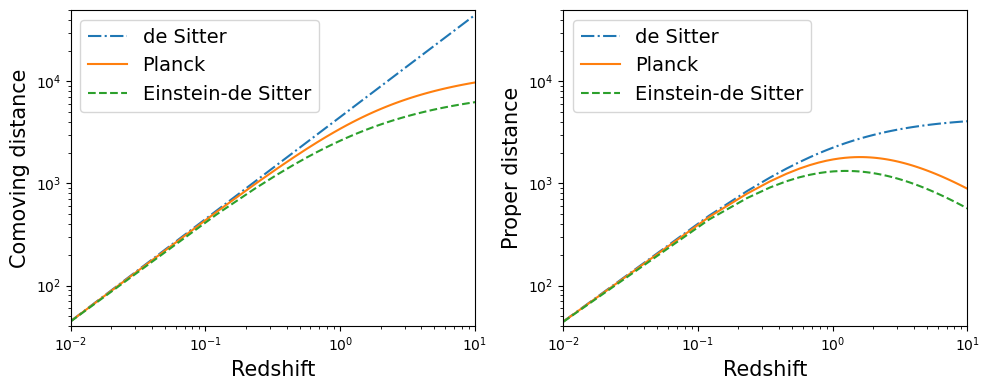

In [9]:
zs = np.linspace(param.code.zmin,param.code.zmax,param.code.Nz)

fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].loglog(zs, D_dS.comoving_dist(zs), ls='-.', label='de Sitter')
axs[0].loglog(zs, D.comoving_dist(zs), ls='-', label='Planck')
axs[0].loglog(zs, D_EdS.comoving_dist(zs), ls='--', label='Einstein-de Sitter')
axs[0].legend(loc=2, fontsize=14)
axs[0].set_xlabel('Redshift', fontsize=15)
axs[0].set_ylabel('Comoving distance', fontsize=15)
axs[0].axis([0.01,10,40,5e4])

axs[1].loglog(zs, D_dS.proper_dist(zs), ls='-.', label='de Sitter')
axs[1].loglog(zs, D.proper_dist(zs), ls='-', label='Planck')
axs[1].loglog(zs, D_EdS.proper_dist(zs), ls='--', label='Einstein-de Sitter')
axs[1].legend(loc=2, fontsize=14)
axs[1].set_xlabel('Redshift', fontsize=15)
axs[1].set_ylabel('Proper distance', fontsize=15)
axs[1].axis([0.01,10,40,5e4])

plt.tight_layout()
plt.show()

## Advanced examples

In this part of the notebook, we will introduce a more widely-used package, [astropy](https://docs.astropy.org/en/stable/cosmology/index.html), to perform cosmological calculations that allows studying more advanced models of our universe.

In [10]:
from astropy import cosmology

Before exploring some sophisticated models of our universe, we should compare the simple implemenation of the cosmological calculation in `AstronomyCalc` with `astropy`. Below we consider the benchmark or $\Lambda$CDM model.

In [11]:
cosmo_flatlcdm = cosmology.FlatLambdaCDM(100*cosmo_dict['h'], cosmo_dict['Om'])

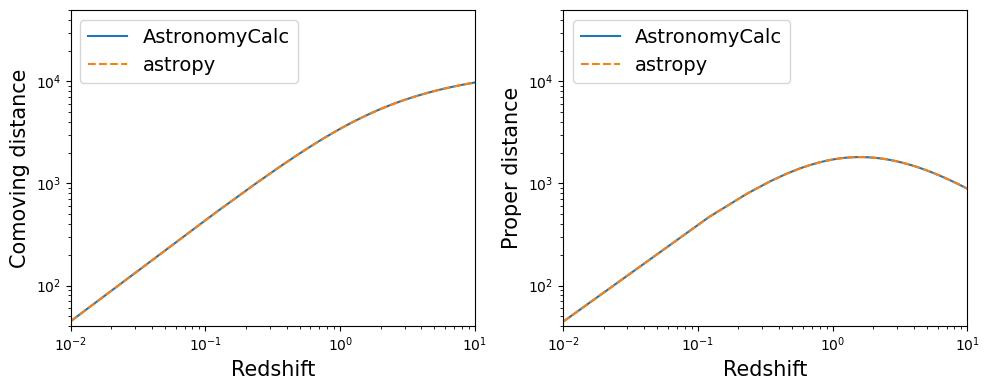

In [12]:
zs = np.linspace(param.code.zmin,param.code.zmax,param.code.Nz)

fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].loglog(zs, D.comoving_dist(zs), ls='-', label='AstronomyCalc')
axs[0].loglog(zs, cosmo_flatlcdm.comoving_distance(zs), ls='--', label='astropy')
axs[0].legend(loc=2, fontsize=14)
axs[0].set_xlabel('Redshift', fontsize=15)
axs[0].set_ylabel('Comoving distance', fontsize=15)
axs[0].axis([0.01,10,40,5e4])

axs[1].loglog(zs, D.proper_dist(zs), ls='-', label='AstronomyCalc')
axs[1].loglog(zs, cosmo_flatlcdm.comoving_distance(zs)/(1+zs), ls='--', label='astropy')
axs[1].legend(loc=2, fontsize=14)
axs[1].set_xlabel('Redshift', fontsize=15)
axs[1].set_ylabel('Proper distance', fontsize=15)
axs[1].axis([0.01,10,40,5e4])

plt.tight_layout()
plt.show()

### Dynamical dark energy model

Till now, we assumed the dark energy component, $\Omega_{DE}$, to be constant ($\Lambda$). However, the nature of this component is still unknown. The current observational data allows this component to evolve over time or redshift, $\Omega_{DE}(z)$. 

We will study a dynamical dark energy model where the dark energy component is given as,

$\Omega_{DE}(z) = \Omega_{\Lambda}(1+z)^{3(1+\omega_0+\omega_{a})}\exp\left(-\frac{3\omega_\mathrm{a} z}{1+z}\right)$ ,

where the $\omega_0$ and $\omega_a$ are additional parameters introduced to define the redshift dependence. $\omega_0=-1$ and $\omega_a=0$ gives the $\Lambda$CDM universe.

In [13]:
cosmo_flatw0wacdm_1 = cosmology.Flatw0waCDM(100*cosmo_dict['h'], cosmo_dict['Om'],
                                         w0=-1.5, wa=0.0)
cosmo_flatw0wacdm_2 = cosmology.Flatw0waCDM(100*cosmo_dict['h'], cosmo_dict['Om'],
                                         w0=-0.5, wa=0.0)

cosmo_flatw0wacdm_3 = cosmology.Flatw0waCDM(100*cosmo_dict['h'], cosmo_dict['Om'],
                                         w0=-1.0, wa=1.5)
cosmo_flatw0wacdm_4 = cosmology.Flatw0waCDM(100*cosmo_dict['h'], cosmo_dict['Om'],
                                         w0=-1.0, wa=-1.5)

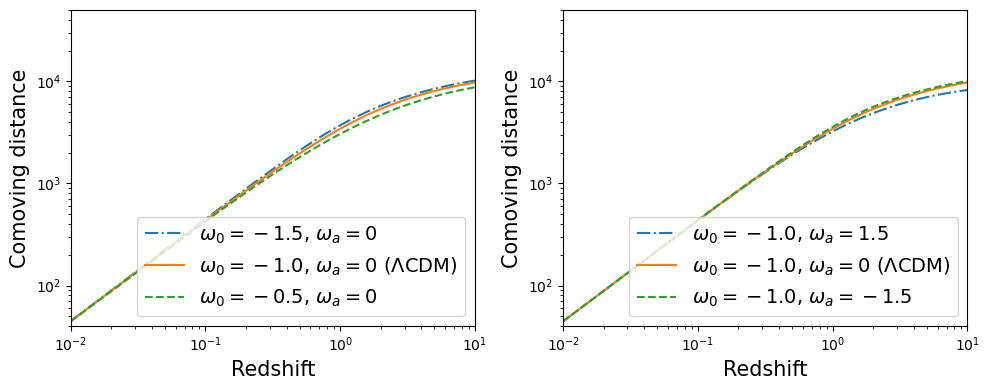

In [14]:
zs = np.linspace(param.code.zmin,param.code.zmax,param.code.Nz)

fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].loglog(zs, cosmo_flatw0wacdm_1.comoving_distance(zs), ls='-.', label='$\omega_0=-1.5$, $\omega_a=0$')
axs[0].loglog(zs, cosmo_flatlcdm.comoving_distance(zs), ls='-', label='$\omega_0=-1.0$, $\omega_a=0$ ($\Lambda$CDM)')
axs[0].loglog(zs, cosmo_flatw0wacdm_2.comoving_distance(zs), ls='--', label='$\omega_0=-0.5$, $\omega_a=0$')
axs[0].legend(loc=4, fontsize=14)
axs[0].set_xlabel('Redshift', fontsize=15)
axs[0].set_ylabel('Comoving distance', fontsize=15)
axs[0].axis([0.01,10,40,5e4])

axs[1].loglog(zs, cosmo_flatw0wacdm_3.comoving_distance(zs), ls='-.', label='$\omega_0=-1.0$, $\omega_a=1.5$')
axs[1].loglog(zs, cosmo_flatlcdm.comoving_distance(zs), ls='-', label='$\omega_0=-1.0$, $\omega_a=0$ ($\Lambda$CDM)')
axs[1].loglog(zs, cosmo_flatw0wacdm_4.comoving_distance(zs), ls='--', label='$\omega_0=-1.0$, $\omega_a=-1.5$')
axs[1].legend(loc=4, fontsize=14)
axs[1].set_xlabel('Redshift', fontsize=15)
axs[1].set_ylabel('Comoving distance', fontsize=15)
axs[1].axis([0.01,10,40,5e4])

plt.tight_layout()
plt.show()

## Assignment

Throughout this notebook, we assumed to be flat ($\Omega_\kappa=0$). Extend this calculation for non-flat scenarios.